In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [7]:
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = train_data.drop(['label'], axis = 1).values
Y = train_data[['label']].values

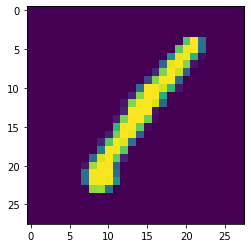

In [11]:
plt.imshow(X[0].reshape([28,28]))

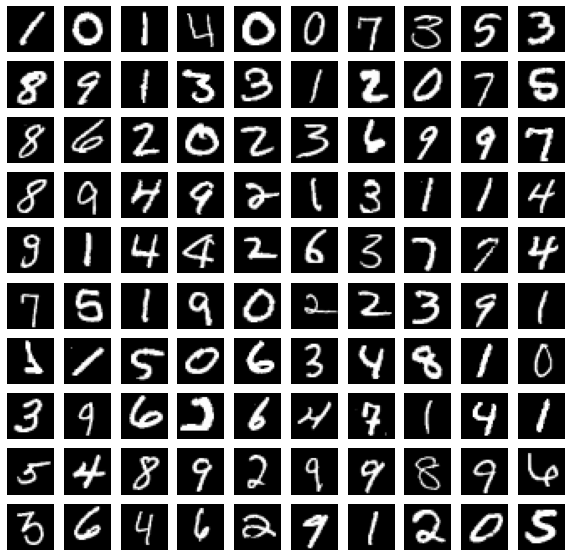

In [13]:
plt.figure(figsize = (10,10))
for i in range(100):
    plt.subplot(10,10,1+i)
    plt.axis('off')
    plt.imshow(X[i].reshape([28,28]), cmap = 'gray')

In [14]:
X = X/255

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 2)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31500, 784)
(31500, 1)
(10500, 784)
(10500, 1)


## Decision tree classifier
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=14, splitter='best')

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion ='entropy', max_depth = 10, random_state = 2)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=2)

In [58]:
pred_train = dt_classifier.predict(x_train)
pred_test = dt_classifier.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
print('Training Accuracy: ', accuracy_score(y_train, pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, pred_test))

Training Accuracy:  0.9306349206349206
Testing Accuracy:  0.8537142857142858


## Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=14,verbose=0,
                       warm_start=False)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20,criterion = 'entropy', max_depth = 20, random_state = 2)
rf_classifier.fit(x_train, y_train)

<ipython-input-40-0adbad7ec435>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=20,
                       random_state=2)

In [41]:
pred_train = rf_classifier.predict(x_train)
pred_test = rf_classifier.predict(x_test)

In [42]:
print('Training Accuracy: ', accuracy_score(y_train, pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, pred_test))

Training Accuracy:  0.9999365079365079
Testing Accuracy:  0.9539047619047619


## XGBoost
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [49]:
import xgboost as xgb
xg_classifier = xgb.XGBClassifier(n_estimators = 20)
xg_classifier.fit(x_train, y_train)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:02:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
pred_train = xg_classifier.predict(x_train)
pred_test = xg_classifier.predict(x_test)

print('Training Accuracy: ', accuracy_score(y_train, pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, pred_test))

Training Accuracy:  0.9916507936507937
Testing Accuracy:  0.956


## LightGBM
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001,min_split_gain=0.0,
               n_estimators=5, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [66]:
import lightgbm as lgb
lg_classifier = lgb.LGBMClassifier(n_estimators = 30)
lg_classifier.fit(x_train, y_train)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMClassifier(n_estimators=30)

In [67]:
pred_train = lg_classifier.predict(x_train)
pred_test = lg_classifier.predict(x_test)

print('Training Accuracy: ', accuracy_score(y_train, pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, pred_test))

Training Accuracy:  0.9896507936507937
Testing Accuracy:  0.956


## Knearest Neighbors

In [69]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kn_classifier.fit(x_train,y_train)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [70]:
pred_train = kn_classifier.predict(x_train)
pred_test = kn_classifier.predict(x_test)

print('Training Accuracy: ', accuracy_score(y_train, pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, pred_test))

Training Accuracy:  0.9775873015873016
Testing Accuracy:  0.9643809523809523


## Voting Classifier

In [72]:
from sklearn.ensemble import VotingClassifier
vt_classifier = VotingClassifier(estimators = [('dt',dt_classifier), ('rf', rf_classifier),('xgb', xg_classifier),('lgbm',lg_classifier),('knn', kn_classifier)], voting = 'hard')
vt_classifier.fit(x_train,y_train)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:47:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=2)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     n_estimators=20,
                                                     random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='g...
                                        

In [73]:
pred_train = vt_classifier.predict(x_train)
pred_test = vt_classifier.predict(x_test)

print('Training Accuracy: ', accuracy_score(y_train, pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, pred_test))

Training Accuracy:  0.9945714285714286
Testing Accuracy:  0.9655238095238096
